In [2]:
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\lunat\AppData\Local\Temp\ipykernel_15652\2876882311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def csv_to_df(csv):
    df = pd.read_csv(csv)
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S').dt.time

    df['timestamp'] = pd.to_datetime('2024-02-18 ' + df['timestamp'].astype(str))

    df.set_index('timestamp', inplace=True)
    return df


In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def plot_graph(df):
    # Calculate relative time in minutes from the start
    relative_time = (df.index - df.index[0]).total_seconds() / 60.0
    
    plt.figure(figsize=(14, 6))
    
    # Plotting the general focus level
    plt.plot(relative_time, df['probability'], label='Focus Level', marker='o', linestyle='-', markersize=5, alpha=0.5)
    
    plt.xlabel('Time (minutes)')
    plt.ylabel('Focus Level')
    plt.title('Focus Level Over Movie Watch Time')
    plt.grid(True)
    
    # Highlighting high focus segments
    high_focus_threshold = 0.5
    high_focus_segments = df[df['probability'] > high_focus_threshold]
    high_focus_relative_time = (high_focus_segments.index - df.index[0]).total_seconds() / 60.0
    
    plt.scatter(high_focus_relative_time, high_focus_segments['probability'], color='red', label='High Focus', marker='*', s=100, edgecolor='black', linewidth=0.5, zorder=3)
    
    # Setting x-axis ticks to every minute
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.legend()
    plt.show()


In [5]:
dw_df = csv_to_df('./js/basics/data/doctor_who_s3e10_focus.csv')


Doctor Who Focus Data


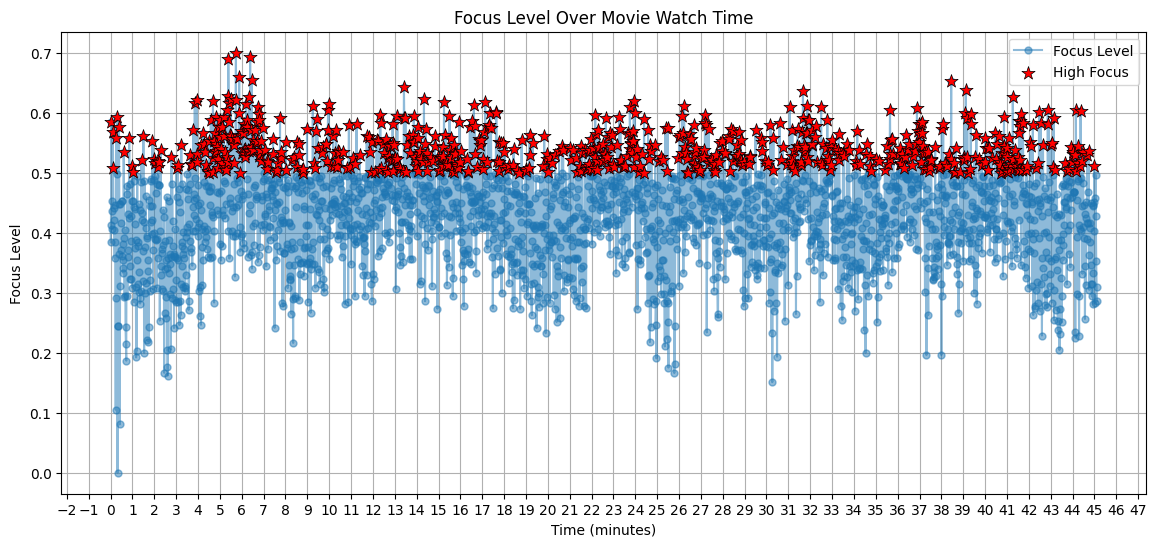

In [6]:
print('Doctor Who Focus Data')
plot_graph(dw_df)


Doctor Who 8s MA Focus Data


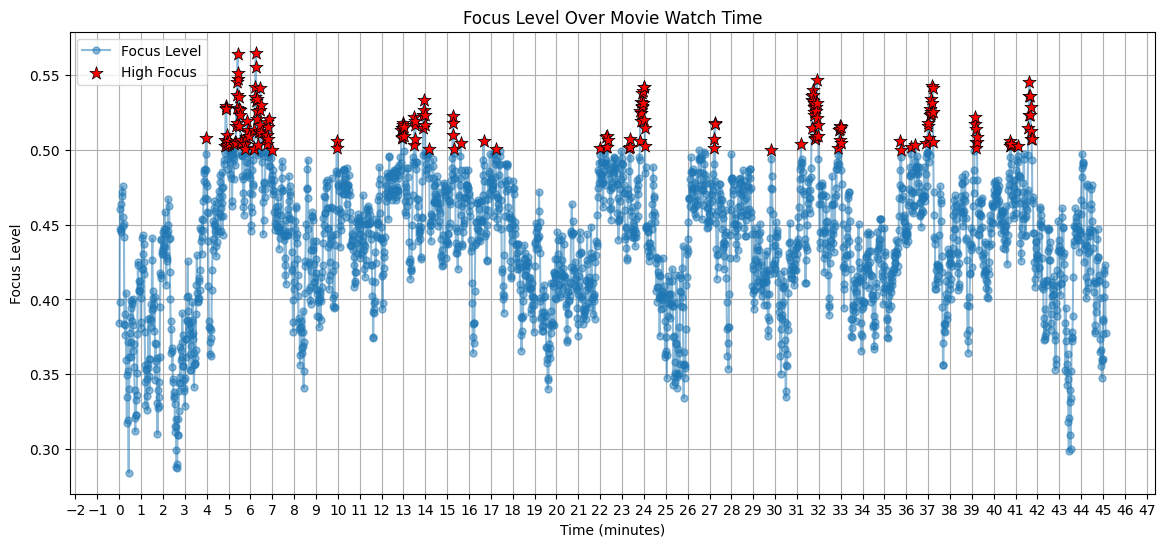

In [7]:
dw_df_smooth = dw_df.copy(deep=True)
dw_df_smooth['probability'] = dw_df_smooth['probability'].rolling('8s').mean()
print('Doctor Who 8s MA Focus Data')
plot_graph(dw_df_smooth)


Doctor Who 60s MA Focus Data


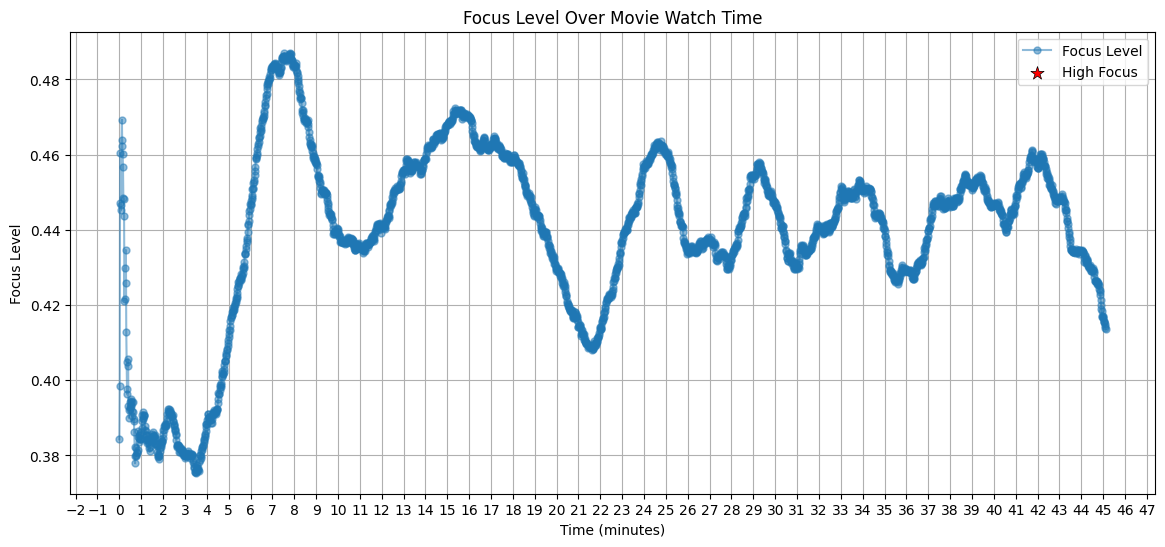

In [9]:
dw_df_smooth = dw_df.copy(deep=True)
dw_df_smooth['probability'] = dw_df_smooth['probability'].rolling('200s').mean()
print('Doctor Who 60s MA Focus Data')
plot_graph(dw_df_smooth)
